# Rescatar datos
## Login
Primero importar biblioteca para extraer datos de Instagram y hacer el login leyendo los datos de usuario desde un archivo para mantenerlos secretos

In [1]:
# Importar bibliotecas
import instaloader
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from itertools import takewhile

In [2]:
BASE_DIR = os.getcwd()
secrets = {}
with open(os.path.join(BASE_DIR, 'secrets.json'), 'r') as f:
    secrets = json.load(f)
user = secrets['user']
password = secrets['password']

loader = instaloader.Instaloader()
loader.login(user, password)

## Recuperación de datos
Ahora vamos a rescatar los datos de las cuentas en la variable homónima y guardarlos en una variable llamada data

In [3]:
# Acá en cuentas agregar/quitar cuentas que se quieran estudiar
cuentas = ['capucha_informa',]
data = {}
for cuenta in cuentas:
    profile = instaloader.Profile.from_username(loader.context, cuenta)
    posts = profile.get_posts()
    data[cuenta] = posts

## Acerca de los datos extraídos 
Los datos de los post obtenidos a través de la biblioteca instaloader estan descritos en detalle en su documentación [acá](https://instaloader.github.io/module/structures.html#instaloader.Post). En particular los datos de: url, texto, likes, comentarios, fecha.

### Utilización de pandas para visualizar y analizar los datos
Para trabajar los datos obtenidos utilizaremos la biblioteca [pandas](https://pandas.pydata.org/) 

In [4]:
columns = ['account', 'url', 'text', 'likes', 'comments', 'date']
dataframe = pd.DataFrame(columns=[])
# Para no llegar al límite de queries tomar todos los post desde hace 7 días en adelante
delta = datetime.utcnow() - timedelta(days=7)

for key in data:
    for post in takewhile(lambda p: p.date > delta, data[key]):
        datum = {
            'account': post.owner_username,
            'url': post.url,
            'text': post.caption,
            'likes': post.likes,
            'comments': post.comments,
            'date': post.date
        }
        dataframe = dataframe.append(datum, ignore_index=True)

## Guardar y usar los datos
En la variable dataframe tenemos almacenados los datos deseados. Podemos guardarlos en un archivo como .csv y obtener distintas visualizaciones como las que aparecen [acá](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).  

In [5]:
#Guardar datos en csv
csv_file = 'datos.csv'
dataframe.to_csv(csv_file)

# Cargar datos desde csv
loaded_data = pd.read_csv(csv_file)

<AxesSubplot:xlabel='date'>

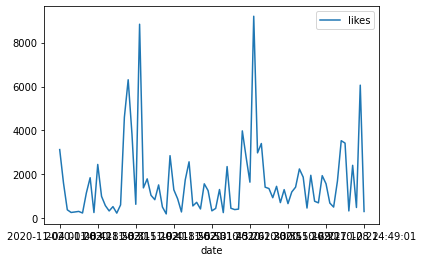

In [6]:
#Visualización simple de likes v/s tiempo
loaded_data.plot(y='likes', x='date')

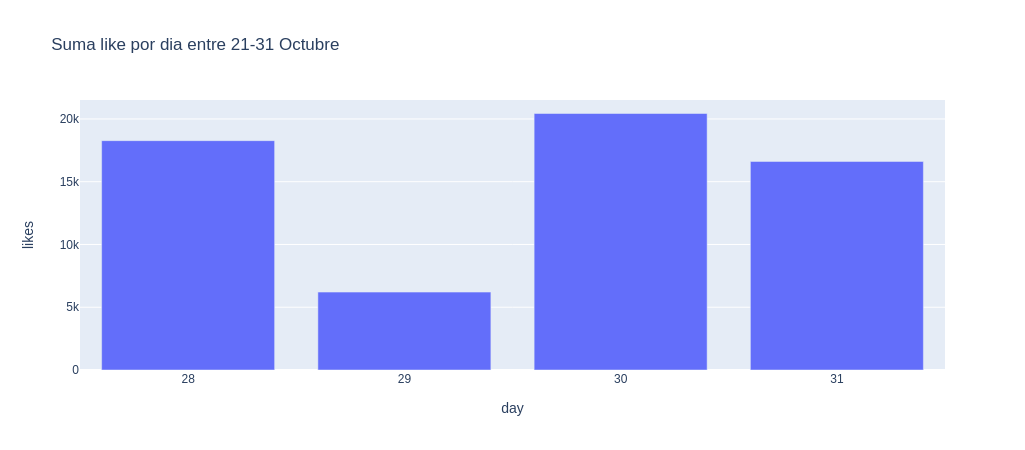

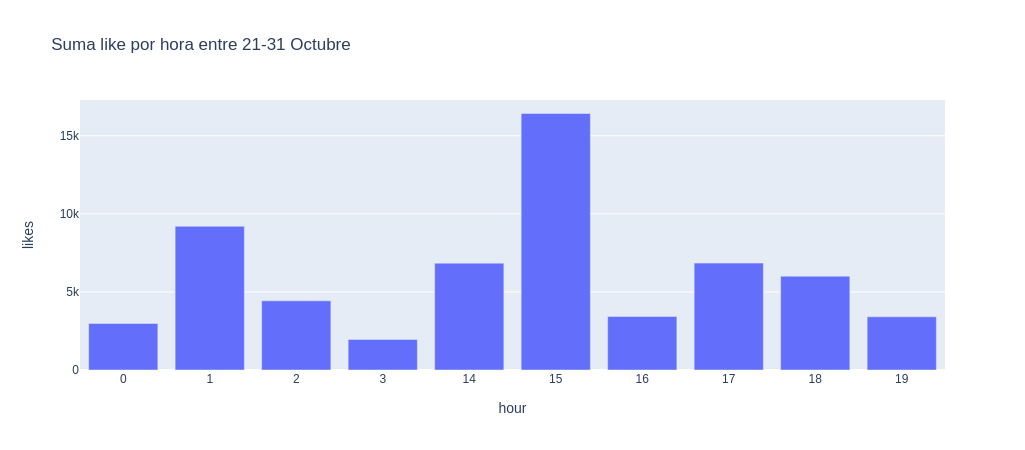

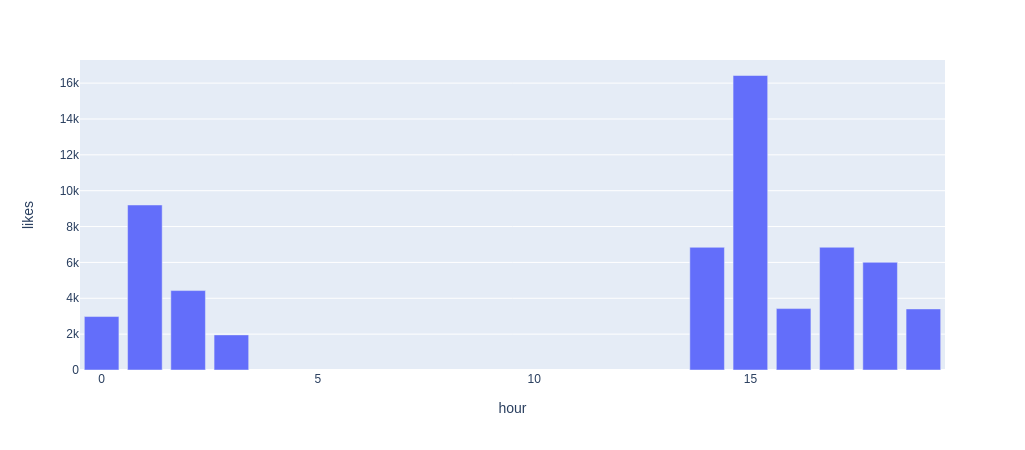

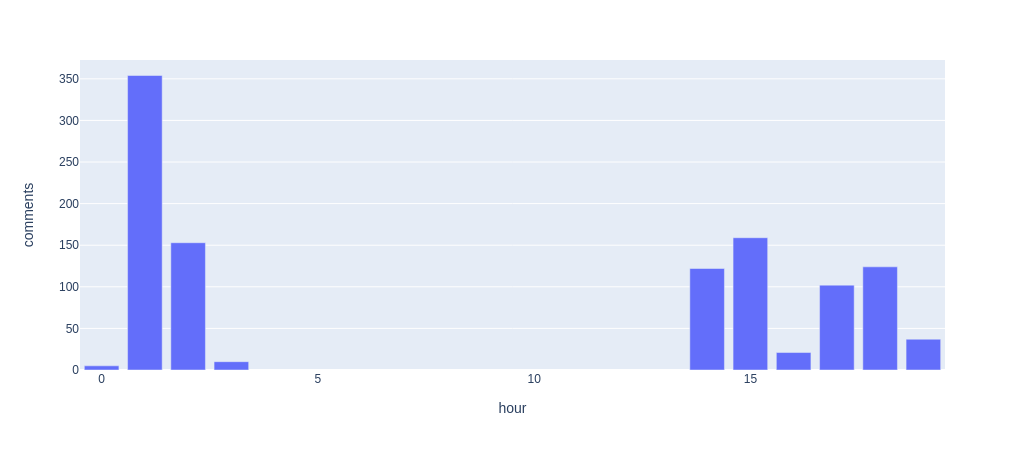

In [7]:
import plotly.express as px
from plotly.offline import  iplot,  init_notebook_mode
init_notebook_mode(connected=True) 

df = pd.read_csv(csv_file)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df= df.loc[df['date'].dt.day>20]

df['day']= df['date'].dt.day
df['hour']= df['date'].dt.hour

df_day = df.groupby('day').sum()
df_day.reset_index(inplace=True)

df_hour = df.groupby('hour').sum()
df_hour.reset_index(inplace=True)

#Visualización simple de likes v/s tiempo

fig = px.bar(df_day, x="day", y="likes",
             title="Suma like por dia entre 21-31 Octubre")
fig.update_xaxes(type='category')
fig.show() 

fig = px.bar(df_hour, x="hour", y="likes",
             title="Suma like por hora entre 21-31 Octubre")
fig.update_xaxes(type='category')
iplot(fig) 



fig = px.bar(df_hour, x="hour", y="likes")
iplot(fig) 

fig = px.bar(df_hour, x="hour", y="comments")
iplot(fig) 